In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_excel('..\\ny_crime_13.xls', header=4)
df.head(n=10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN
5,Alfred Village,4089.0,5.0,0.0,NaN,0.0,3.0,2.0,46.0,10.0,36.0,0.0,NaN
6,Allegany Village,1781.0,3.0,0.0,NaN,0.0,0.0,3.0,10.0,0.0,10.0,0.0,0.0
7,Amherst Town,118296.0,107.0,1.0,NaN,7.0,31.0,68.0,2118.0,204.0,1882.0,32.0,3.0
8,Amityville Village,9519.0,9.0,0.0,NaN,2.0,4.0,3.0,210.0,16.0,188.0,6.0,1.0
9,Amsterdam,18182.0,30.0,0.0,NaN,0.0,12.0,18.0,405.0,99.0,291.0,15.0,0.0


In [3]:
df_features = pd.DataFrame()
df_features['pop'] = df['Population']
df_features['pop_squared'] = df_features['pop']**2
df_features['murder_bin'] = np.where(df.iloc[:, 3] > 0, 1, 0)
df_features['murder'] = df.iloc[:,3]
df_features['robbery_bin'] = np.where(df.iloc[:, 6] > 0, 1, 0)
df_features['robbery'] = df.iloc[:, 6]
df_features['theft_bin'] = np.where(df['Larceny-\ntheft'] > 0, 1, 0)
df_features['theft'] = df['Larceny-\ntheft']
df_features['prop_crime'] = df.loc[:, 'Property\ncrime']
df_features['violent'] = df['Violent\ncrime']
df_features.dropna(inplace=True)
df_features.head()

,pop,pop_squared,murder_bin,murder,robbery_bin,robbery,theft_bin,theft,prop_crime,violent
0,1861.0,3.463321e+06,0,0.0,0,0.0,1,10.0,12.0,0.0
1,2577.0,6.640929e+06,0,0.0,0,0.0,1,20.0,24.0,3.0
2,2846.0,8.099716e+06,0,0.0,0,0.0,1,15.0,16.0,3.0
3,97956.0,9.595378e+09,1,8.0,1,227.0,1,3243.0,4090.0,791.0
4,6388.0,4.080654e+07,0,0.0,1,4.0,1,165.0,223.0,23.0


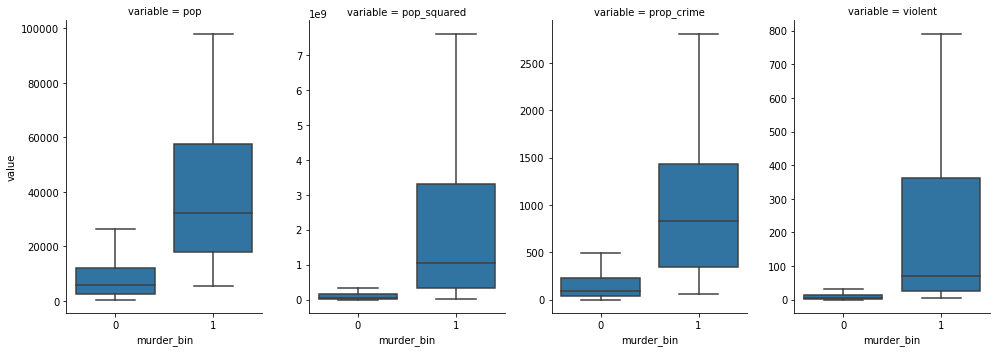

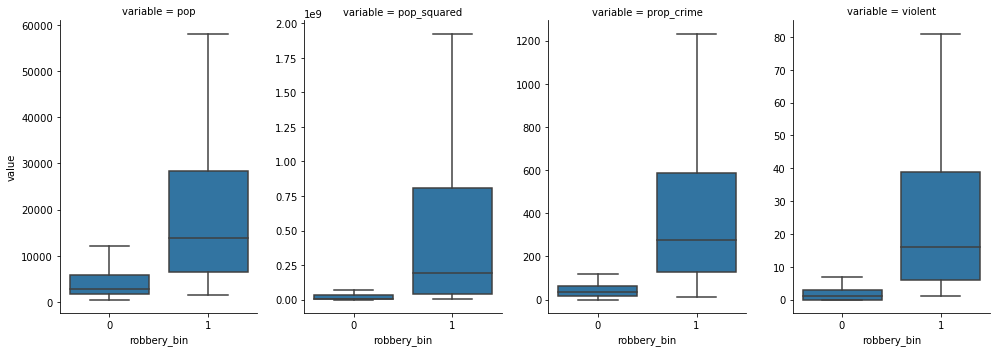

In [4]:
# Restructure the data so we can use facetgrid
df_long = df_features
df_long = pd.melt(df_long.drop(['murder', 'robbery', 'theft', 'theft_bin'], axis=1),
                  id_vars=['murder_bin', 'robbery_bin'])
g = sns.FacetGrid(df_long, col='variable', size = 5, aspect=.7, sharey=False)
g = g.map(sns.boxplot, 'murder_bin', 'value', showfliers=False)
plt.show()

g2 = sns.FacetGrid(df_long, col='variable', size = 5, aspect=.7, sharey=False)
g2 = g2.map(sns.boxplot, 'robbery_bin', 'value', showfliers=False)
plt.tight_layout()
plt.show()

These boxplots show that places that have murder and robbery occur more in places with higher population. The last column of boxplots shows that property crime is higher in places with robbery and murder, but that is most likely becasue areas of high crime are grouped together.

In [5]:
regr = linear_model.LinearRegression()
Y = df_features['prop_crime'].values.reshape(-1,1)
parameters = ['theft', 'robbery', 'murder', 'pop', 'pop_squared']
X = df_features[parameters]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
regr.fit(X_train,y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared on the training set:')
print(regr.score(X_train, y_train))
print('\nR-squared on the test set:')
print(regr.score(X_test, y_test))


Coefficients: 
 [[  1.22302976e+00   1.59724914e+00   1.82824503e+01  -1.48869257e-03
   -3.76101816e-10]]

Intercept: 
 [ 6.45283389]

R-squared on the training set:
0.999973574029

R-squared on the test set:
0.992429832761


These are pretty high r-squared values, but since they are both pretty high, I'd say that we are ok.

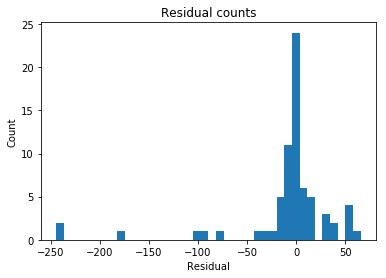

In [6]:
y_pred = regr.predict(X_test)
residual = y_test - y_pred
plt.hist(residual, bins=40)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
# plt.xlim([-500, 500])
plt.show()

I still do not have enough experience to know if this is considered normal or not... It almost appears that it has a left tail, and a strange bump thing on the right. Could this mean that a variable is missing, and could explain the two little bumps on either side?

Or perhaps these are just outliers?

In [7]:
correlation_matrix = X.corr()
display(correlation_matrix)

,theft,robbery,murder,pop,pop_squared
theft,1.000000,0.998735,0.993175,0.997946,0.993778
robbery,0.998735,1.000000,0.993104,0.998469,0.995876
murder,0.993175,0.993104,1.000000,0.986758,0.979574
pop,0.997946,0.998469,0.986758,1.000000,0.998264
pop_squared,0.993778,0.995876,0.979574,0.998264,1.000000


When using binary categorical variables, they are lowly correlated with each other. However, as we saw in the box plots, the number of crimes committed is highly correlated with the population. Both methods give a pretty reasonably good classifier.

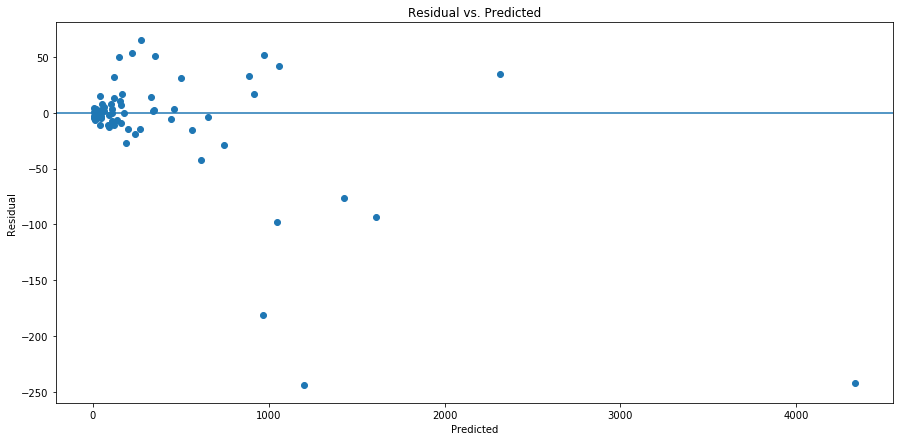

In [8]:
plt.figure(figsize=(15,7))
plt.scatter(y_pred, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
# plt.xlim([-200, 1000])
plt.show()



Interesting. I have played around with switching the features between binary and actual values. Using the raw values produces a better classifier with a tighter cluster of residuals at lower estimates. Our classifier seems to fail at the higher predictions, and I think this may be due to the fact that we have much less data for higher populations. Perhaps we could classify these predictions as outliers, and get rid of the data that caused them? If that's the case, then we would need to be careful to only use our classifier with data that fits into the same domain as the predictions we kept.

# Evaluating the Classifier
_From here on, everything will be new content. All of the above was copied from a previous assignment._

The first thing we should do is run a whole model F-test. I will do this by hand for my understanding.

In [9]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [10]:
ssef = ((df_features.prop_crime.values - y_pred)**2).sum()
sser = ((df_features.prop_crime - df_features.prop_crime.mean())**2).sum()
n = len(df_features.prop_crime)
pf = len(parameters)
pr = 1
dff = n - pf
dfr = n - pr

f_test = ((ssef-sser)/(dff - dfr))/(ssef/dff)
f_test

-84.537323179074434

It is unclear at this point what I should do with a p-value of $-84.5$. I am fairly sure that this means my model is significant, but then again I'm unsure because I've never seen a negative p-value, and the f-test distribution itself is never negative either. So... Good to go?

In [11]:
linear_formula = 'prop_crime ~ theft+robbery+murder+pop+pop_squared'

# Now fit the model using a different module then before so we can pull out the
# individual p-values of significance for each parameter
lin_mod = smf.ols(formula=linear_formula, data=df_features).fit()

In [12]:
lin_mod.params

Intercept      6.636218e+00
theft          1.220573e+00
robbery        1.743689e+00
murder         1.457699e+01
pop           -1.593629e-03
pop_squared   -3.817093e-10
dtype: float64

In [13]:
lin_mod.pvalues

Intercept       3.608663e-02
theft          2.216770e-266
robbery         2.140640e-41
murder          1.469202e-07
pop             1.757729e-11
pop_squared     1.542294e-64
dtype: float64

Let's add another feature, but we will add it to a separate model. I want to see how an additional feature will affect the generalization to another dataset.

In [14]:
regr2 = linear_model.LinearRegression()
Y = df_features['prop_crime'].values.reshape(-1,1)
parameters = ['theft', 'robbery', 'murder', 'pop', 'pop_squared', 'violent']
X = df_features[parameters]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
regr2.fit(X_train,y_train)

# Inspect the results.
print('\nCoefficients: \n', regr2.coef_)
print('\nIntercept: \n', regr2.intercept_)
print('\nR-squared on the training set:')
print(regr2.score(X_train, y_train))
print('\nR-squared on the test set:')
print(regr2.score(X_test, y_test))


Coefficients: 
 [[  1.19414921e+00  -1.05974132e+00   2.25827333e+01  -1.52948607e-03
   -4.34792424e-10   1.09539885e+00]]

Intercept: 
 [ 4.83745844]

R-squared on the training set:
0.999981465919

R-squared on the test set:
0.987351627731


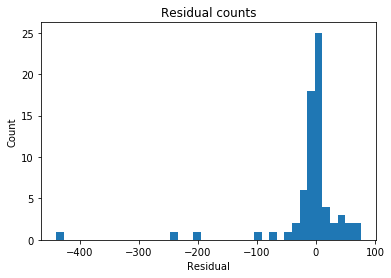

In [15]:
y_pred = regr2.predict(X_test)
residual = y_test - y_pred
plt.hist(residual, bins=40)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
# plt.xlim([-500, 500])
plt.show()

In [16]:
correlation_matrix = X.corr()
display(correlation_matrix)

,theft,robbery,murder,pop,pop_squared,violent
theft,1.000000,0.998735,0.993175,0.997946,0.993778,0.998762
robbery,0.998735,1.000000,0.993104,0.998469,0.995876,0.999923
murder,0.993175,0.993104,1.000000,0.986758,0.979574,0.992098
pop,0.997946,0.998469,0.986758,1.000000,0.998264,0.998854
pop_squared,0.993778,0.995876,0.979574,0.998264,1.000000,0.996575
violent,0.998762,0.999923,0.992098,0.998854,0.996575,1.000000


From my discussion with Katherine, high multi-collinearity results in an unstable model. This manifests itself in coefficients that are different every time we run the model. However, I'm operating on the technicality that the assignment originally asked for a model that explains the most variance possible, rather than understanding the mechanisms. So, with that in mind, I'm going to move on even though these are all really highly correlated!

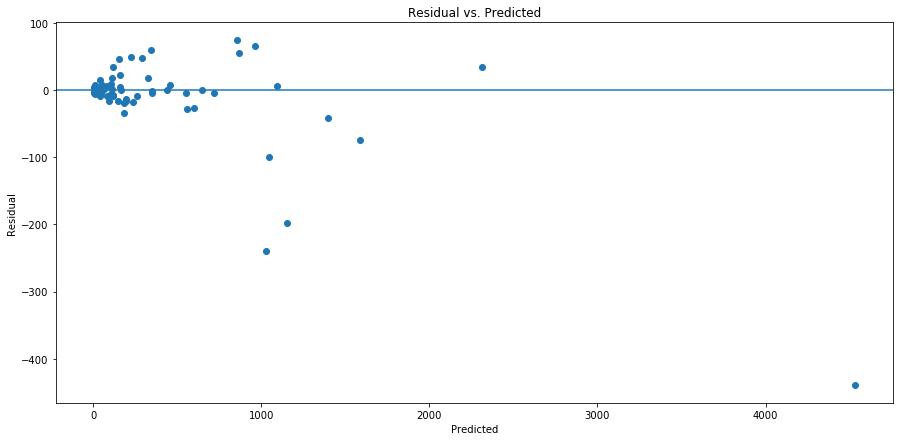

In [17]:
plt.figure(figsize=(15,7))
plt.scatter(y_pred, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
# plt.xlim([-200, 1000])
plt.show()

This got better as well, and I'm pretty pleased with that. I have a gut feeling that we are overfitting, becasue that r-value is extremely high. Let's find out with a new data set!

In [18]:
# Load in a brand new dataset. I chose the california crime dataset, also from 2013.
df_ca = pd.read_excel('..\\ny_crime_13.xls', header=4)
df_ca.head(n=5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [19]:
# Create the same features that we made for the NY dataset
df_ca_features = pd.DataFrame()
df_ca_features['pop'] = df['Population']
df_ca_features['pop_squared'] = df_ca_features['pop']**2
df_ca_features['murder'] = df.iloc[:,3]
df_ca_features['robbery'] = df.iloc[:, 6]
df_ca_features['theft'] = df['Larceny-\ntheft']
df_ca_features['prop_crime'] = df.loc[:, 'Property\ncrime']
df_ca_features['violent'] = df['Violent\ncrime']
df_ca_features.dropna(inplace=True)
df_ca_features.head()

,pop,pop_squared,murder,robbery,theft,prop_crime,violent
0,1861.0,3.463321e+06,0.0,0.0,10.0,12.0,0.0
1,2577.0,6.640929e+06,0.0,0.0,20.0,24.0,3.0
2,2846.0,8.099716e+06,0.0,0.0,15.0,16.0,3.0
3,97956.0,9.595378e+09,8.0,227.0,3243.0,4090.0,791.0
4,6388.0,4.080654e+07,0.0,4.0,165.0,223.0,23.0


In [20]:
# We will treat the entire dataset as a test set, because we want to see
# how our model generalizes to a different dataset.
Y_ca = df_ca_features['prop_crime'].values.reshape(-1,1)
parameters = ['theft', 'robbery', 'murder', 'pop', 'pop_squared', 'violent']
X_ca = df_ca_features[parameters]

print('\nR-squared on the test set:')
print(regr2.score(X_ca, Y_ca))


R-squared on the test set:
0.999964825797


Wow. This model still has an extremely high $R^2$ value. I'm still really hesitant to say that we are doing well, but then again maybe this dataset was chosen specifically for its ease of model fitting. I just can't say at this point!

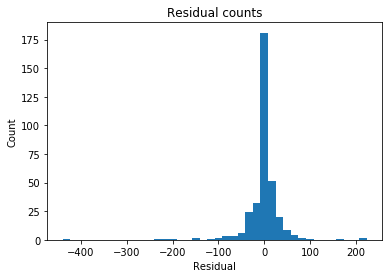

In [21]:
y_pred = regr2.predict(X_ca)
residual = Y_ca - y_pred
plt.hist(residual, bins=40)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
# plt.xlim([-500, 500])
plt.show()

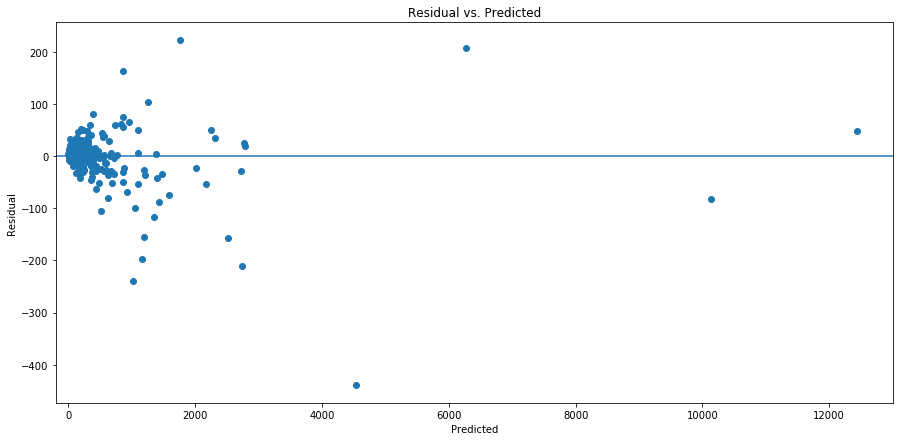

In [22]:
plt.figure(figsize=(15,7))
plt.scatter(y_pred, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.xlim([-200, 13000])
plt.show()

This seems to be fine too, I think. Turning it in.